**Fetal Health Classification**<br><br>
Created by: Noor Kharismawan Akbar (JCDSOL-009-038)

<hr>

# **A. Business Problem Understanding**

<hr>

## **1. Background**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births. Parallel to notion of child mortality is of course maternal mortality, which accounts for 295,000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented. In light of what was mentioned above, [Cardiotocograms (CTGs)](https://en.wikipedia.org/wiki/Cardiotocography) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more. In this notebook we will try to analyze the CTGs data to solve the above issues.

<hr>

## **2. Problem Statement**

The challenge for every fetal health expert is knowing how to prevent child and maternal deaths. In the world of health, **early detection is very important to determine appropriate treatment. Especially for fetal health which concerns the lives of the mother and baby**. Using the available data, An appropriate model is needed to built to determine fetal health.

<hr>

## **3. Goals**

The aim of this project is **to predict and classify the health of the fetus with the best accuracy possible**. Hopefully, with this model, it can prevent child and maternal deaths.

<hr>

## **4. Analytic Approach**

**Data analysis** will be carried out to **find patterns** in the features contained in the dataset, which differentiate one fetus from another. Seeing the existing problem, we will build a **machine learning model** because we need to **build predictions** more than just using an inferential and/or descriptive analysis approach.

<hr>

## **5. Modelling**

The existing data has labels so we use a supervised machine learning model. We will use [**Classification**](https://www.datacamp.com/blog/classification-machine-learning) because we need the model that can predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

We will try 5 supervised classification machine learning models:
1. Gradient Boosting Machine (GBM)
2. K-nearest neighbors (KNN)
3. Logistic Regression (LR)
4. Random Forest (RF)
5. Support Vector Machine (SVM)

<hr>

# **C. Data**

This dataset obtain from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) that contains 2,126 records of features extracted from [Cardiotocogram exams](https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9), which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect
* Pathological

<hr>

## **1. Import Libraries & Load Dataset**

In [107]:
# Import libraries
from subprocess import check_output
from collections import Counter

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler

import pickle

In [108]:
# Warning filter
warnings.simplefilter(action ='ignore')
warnings.filterwarnings('ignore')

In [109]:
# Download dataset
!gdown '1AzI4DZhbSWgebr6PycARcIMyUzuIf_QH'

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [110]:
# Load dataset
df = pd.read_csv('fetal_health.csv')

<hr>

## **2. Data Understanding**

### **a. Dataset General Information**

In [111]:
# First 5 row of data
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [112]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Column description:
*   `baseline value`: Baseline Fetal Heart Rate (FHR)
*   `accelerations`: Number of accelerations per second
*   `fetal_movement`: Number of fetal movements per second
*   `uterine_contractions`: Number of uterine contractions per second
*   `light_decelerations`: Number of LDs per second
*   `severe_decelerations`: Number of SDs per second
*   `prolongued_decelerations`: Number of abnormal fetal heart rate (FHR) finding per second
*   `abnormal_short_term_variability`: Percentage of time with abnormal short term variability
*   `mean_value_of_short_term_variability`: Mean value of short term variability
*   `percentage_of_time_with_abnormal_long_term_variability`: Percentage of time with abnormal long term variability

In [113]:
# Data insight
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### **b. Missing Values**

In [114]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().sample(5,replace=True).values)]);

df_desc = pd.DataFrame(columns=['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample'],
                     data=listItem)
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
0,baseline value,float64,0,0.0,48,"[121.0, 156.0, 142.0, 117.0, 154.0]"
1,accelerations,float64,0,0.0,20,"[0.014, 0.019, 0.006, 0.0, 0.013]"
2,fetal_movement,float64,0,0.0,102,"[0.025, 0.045, 0.408, 0.025, 0.085]"
3,uterine_contractions,float64,0,0.0,16,"[0.012, 0.003, 0.001, 0.001, 0.009]"
4,light_decelerations,float64,0,0.0,16,"[0.002, 0.0, 0.015, 0.009, 0.009]"
5,severe_decelerations,float64,0,0.0,2,"[0.0, 0.0, 0.001, 0.001, 0.0]"
6,prolongued_decelerations,float64,0,0.0,6,"[0.003, 0.003, 0.005, 0.005, 0.005]"
7,abnormal_short_term_variability,float64,0,0.0,75,"[65.0, 33.0, 40.0, 56.0, 19.0]"
8,mean_value_of_short_term_variability,float64,0,0.0,57,"[2.9, 4.8, 3.5, 0.8, 4.2]"
9,percentage_of_time_with_abnormal_long_term_var...,float64,0,0.0,87,"[88.0, 32.0, 74.0, 49.0, 56.0]"


Note:
*   No null value
*   No n.a. value



### **c. Detecting Outliers**

In [115]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

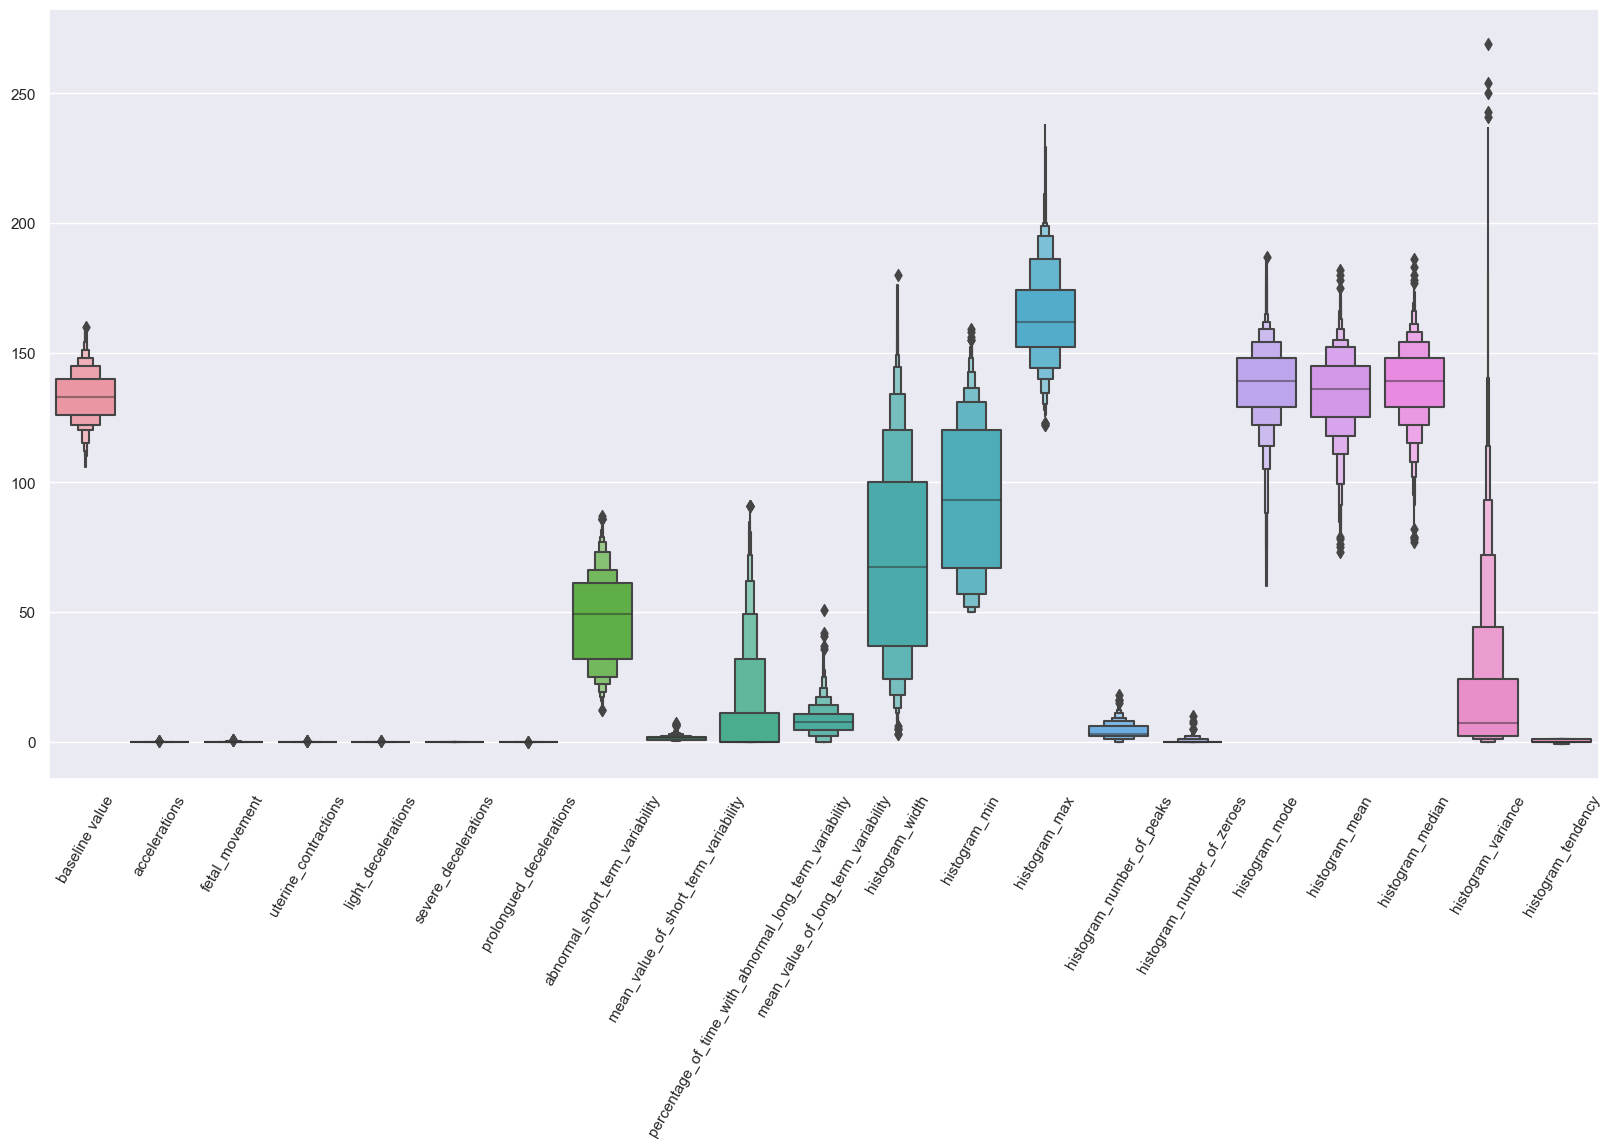

In [116]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=60)
plt.show()

### **d. Data Correlation**

The correlation of all available columns in the dataset will be reviewed against the target column (`fetal_health`).

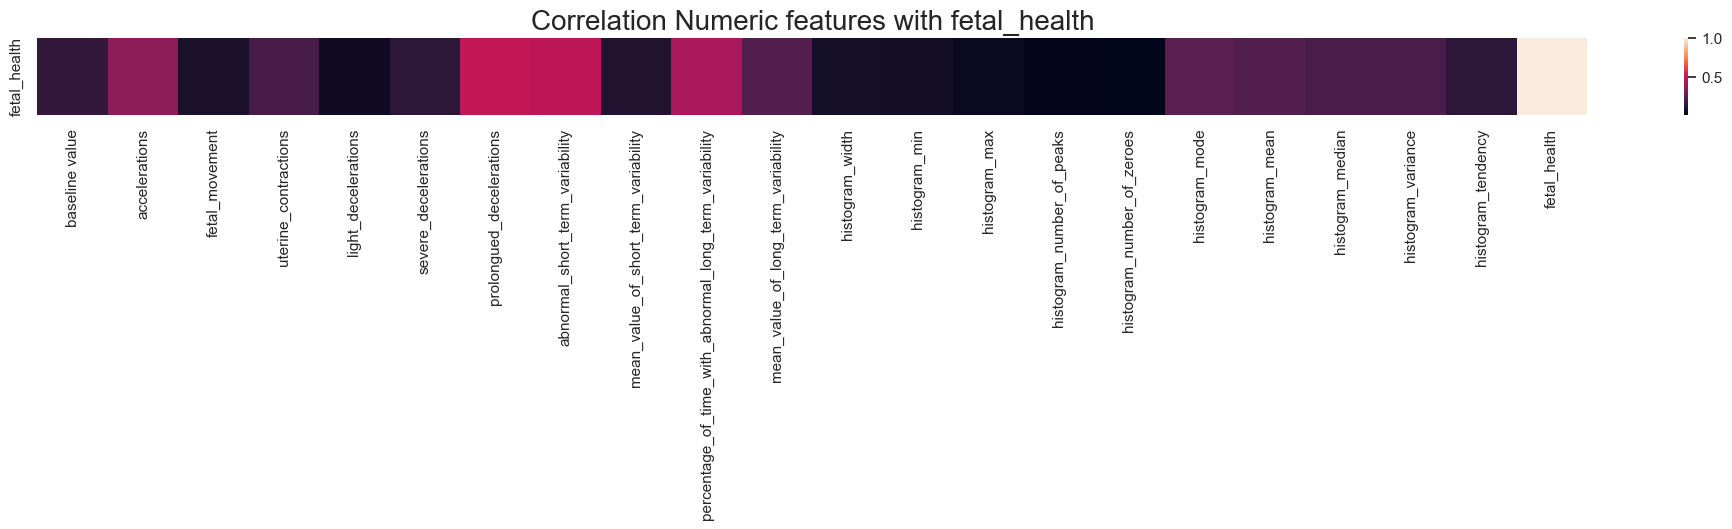

In [117]:
numeric_data = df.select_dtypes(exclude='object')
numeric_corr = numeric_data.corr()
f, ax = plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.abs().sort_values(by=['fetal_health'], ascending=False).head(1))
plt.title('Correlation Numeric features with fetal_health', fontsize=20)
plt.show()

In [118]:
num_feature = numeric_corr['fetal_health'].abs().sort_values(ascending=False).to_frame()

cm = sns.light_palette('steelblue', as_cmap=True)

style = num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
accelerations,0.364066
histogram_mode,0.250412
histogram_mean,0.226985
mean_value_of_long_term_variability,0.226797
histogram_variance,0.206630
histogram_median,0.205033


Highest correlation with `fetal_health`:
1.   `prolongued_decelerations`
2.   `abnormal_short_term_variability`
3.   `percentage_of_time_with_abnormal_long_term_variability`

<Axes: >

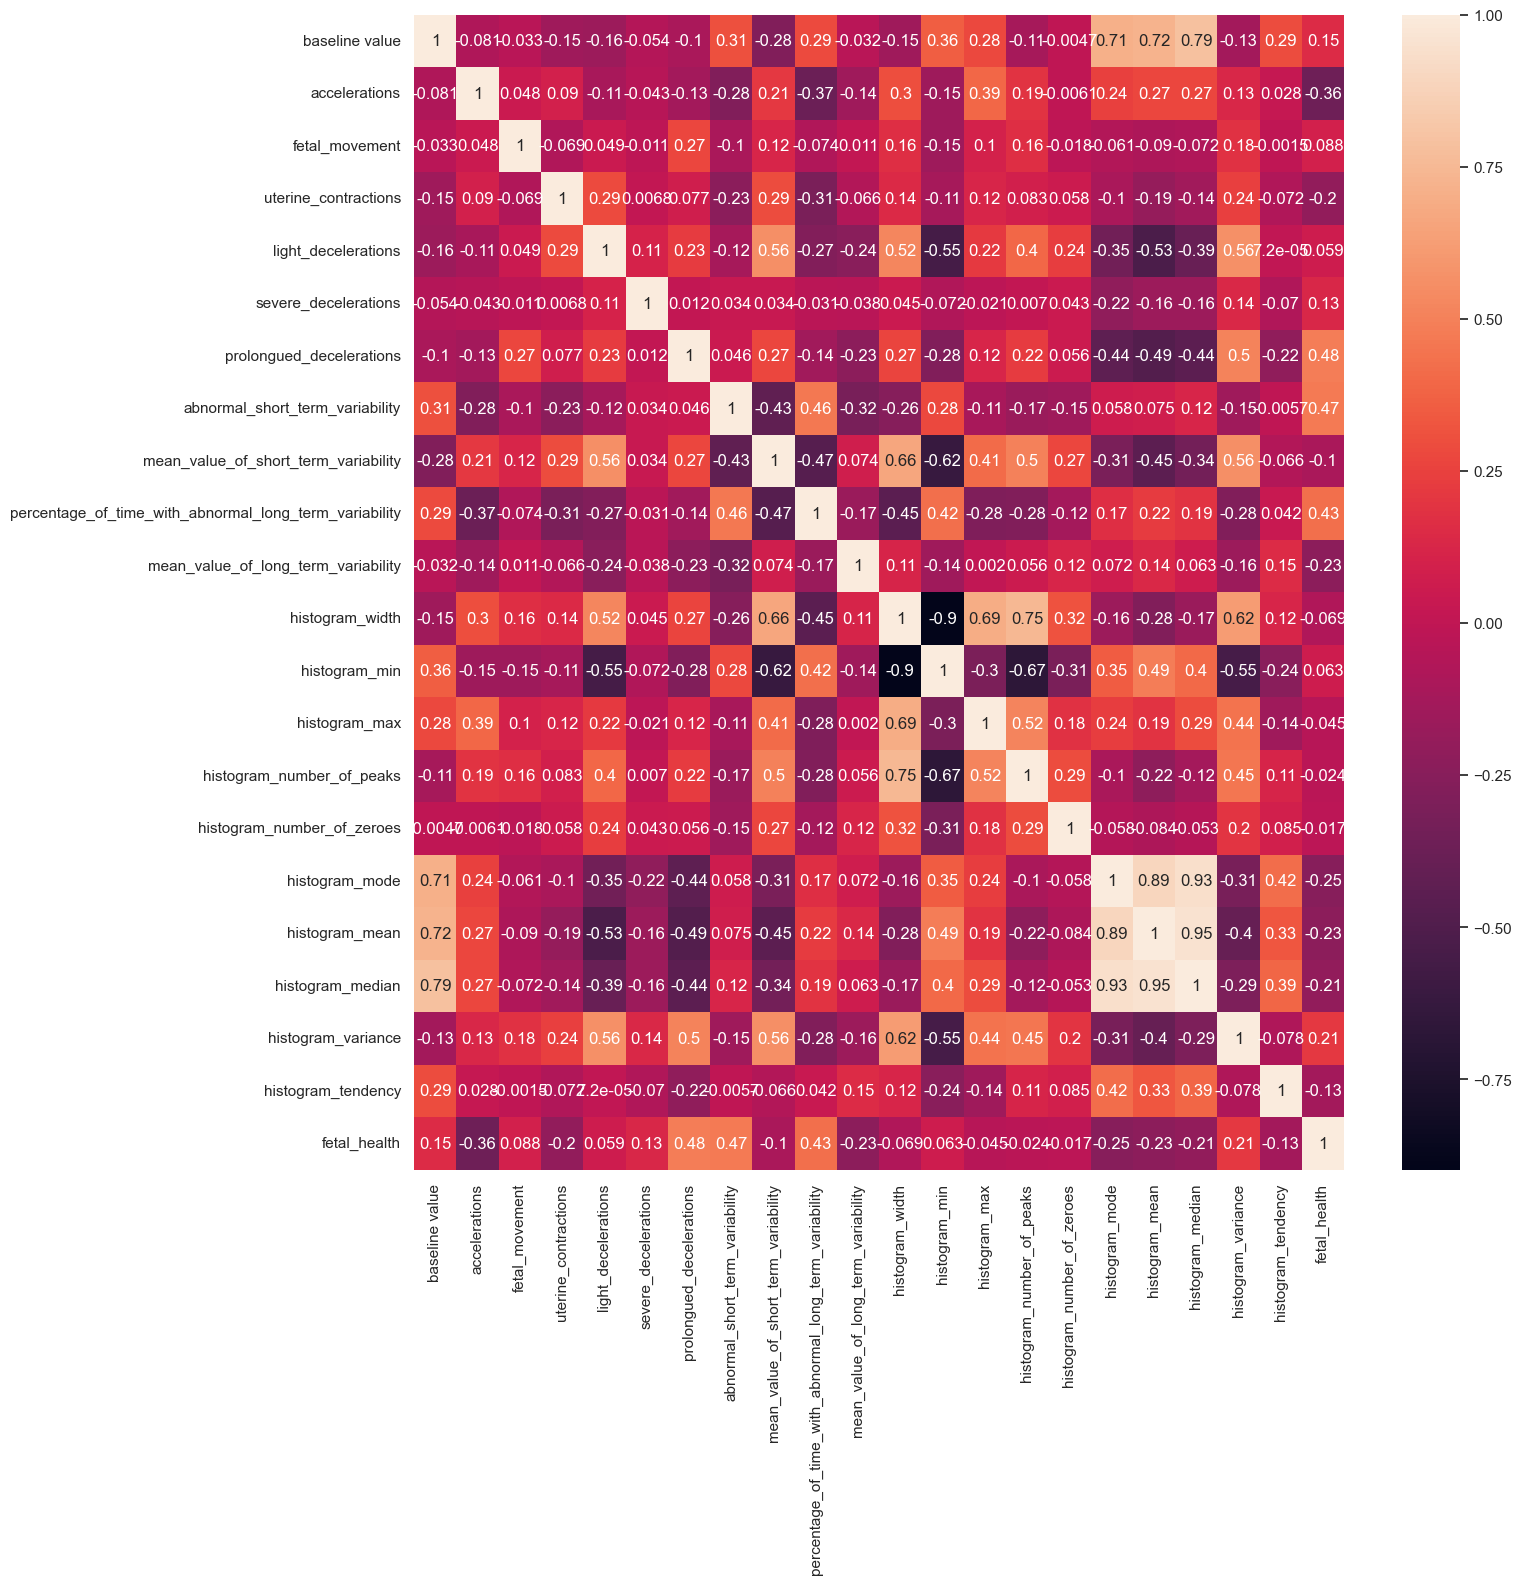

In [119]:
# Column correlation with heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### **e. Data Overview & Visualization**

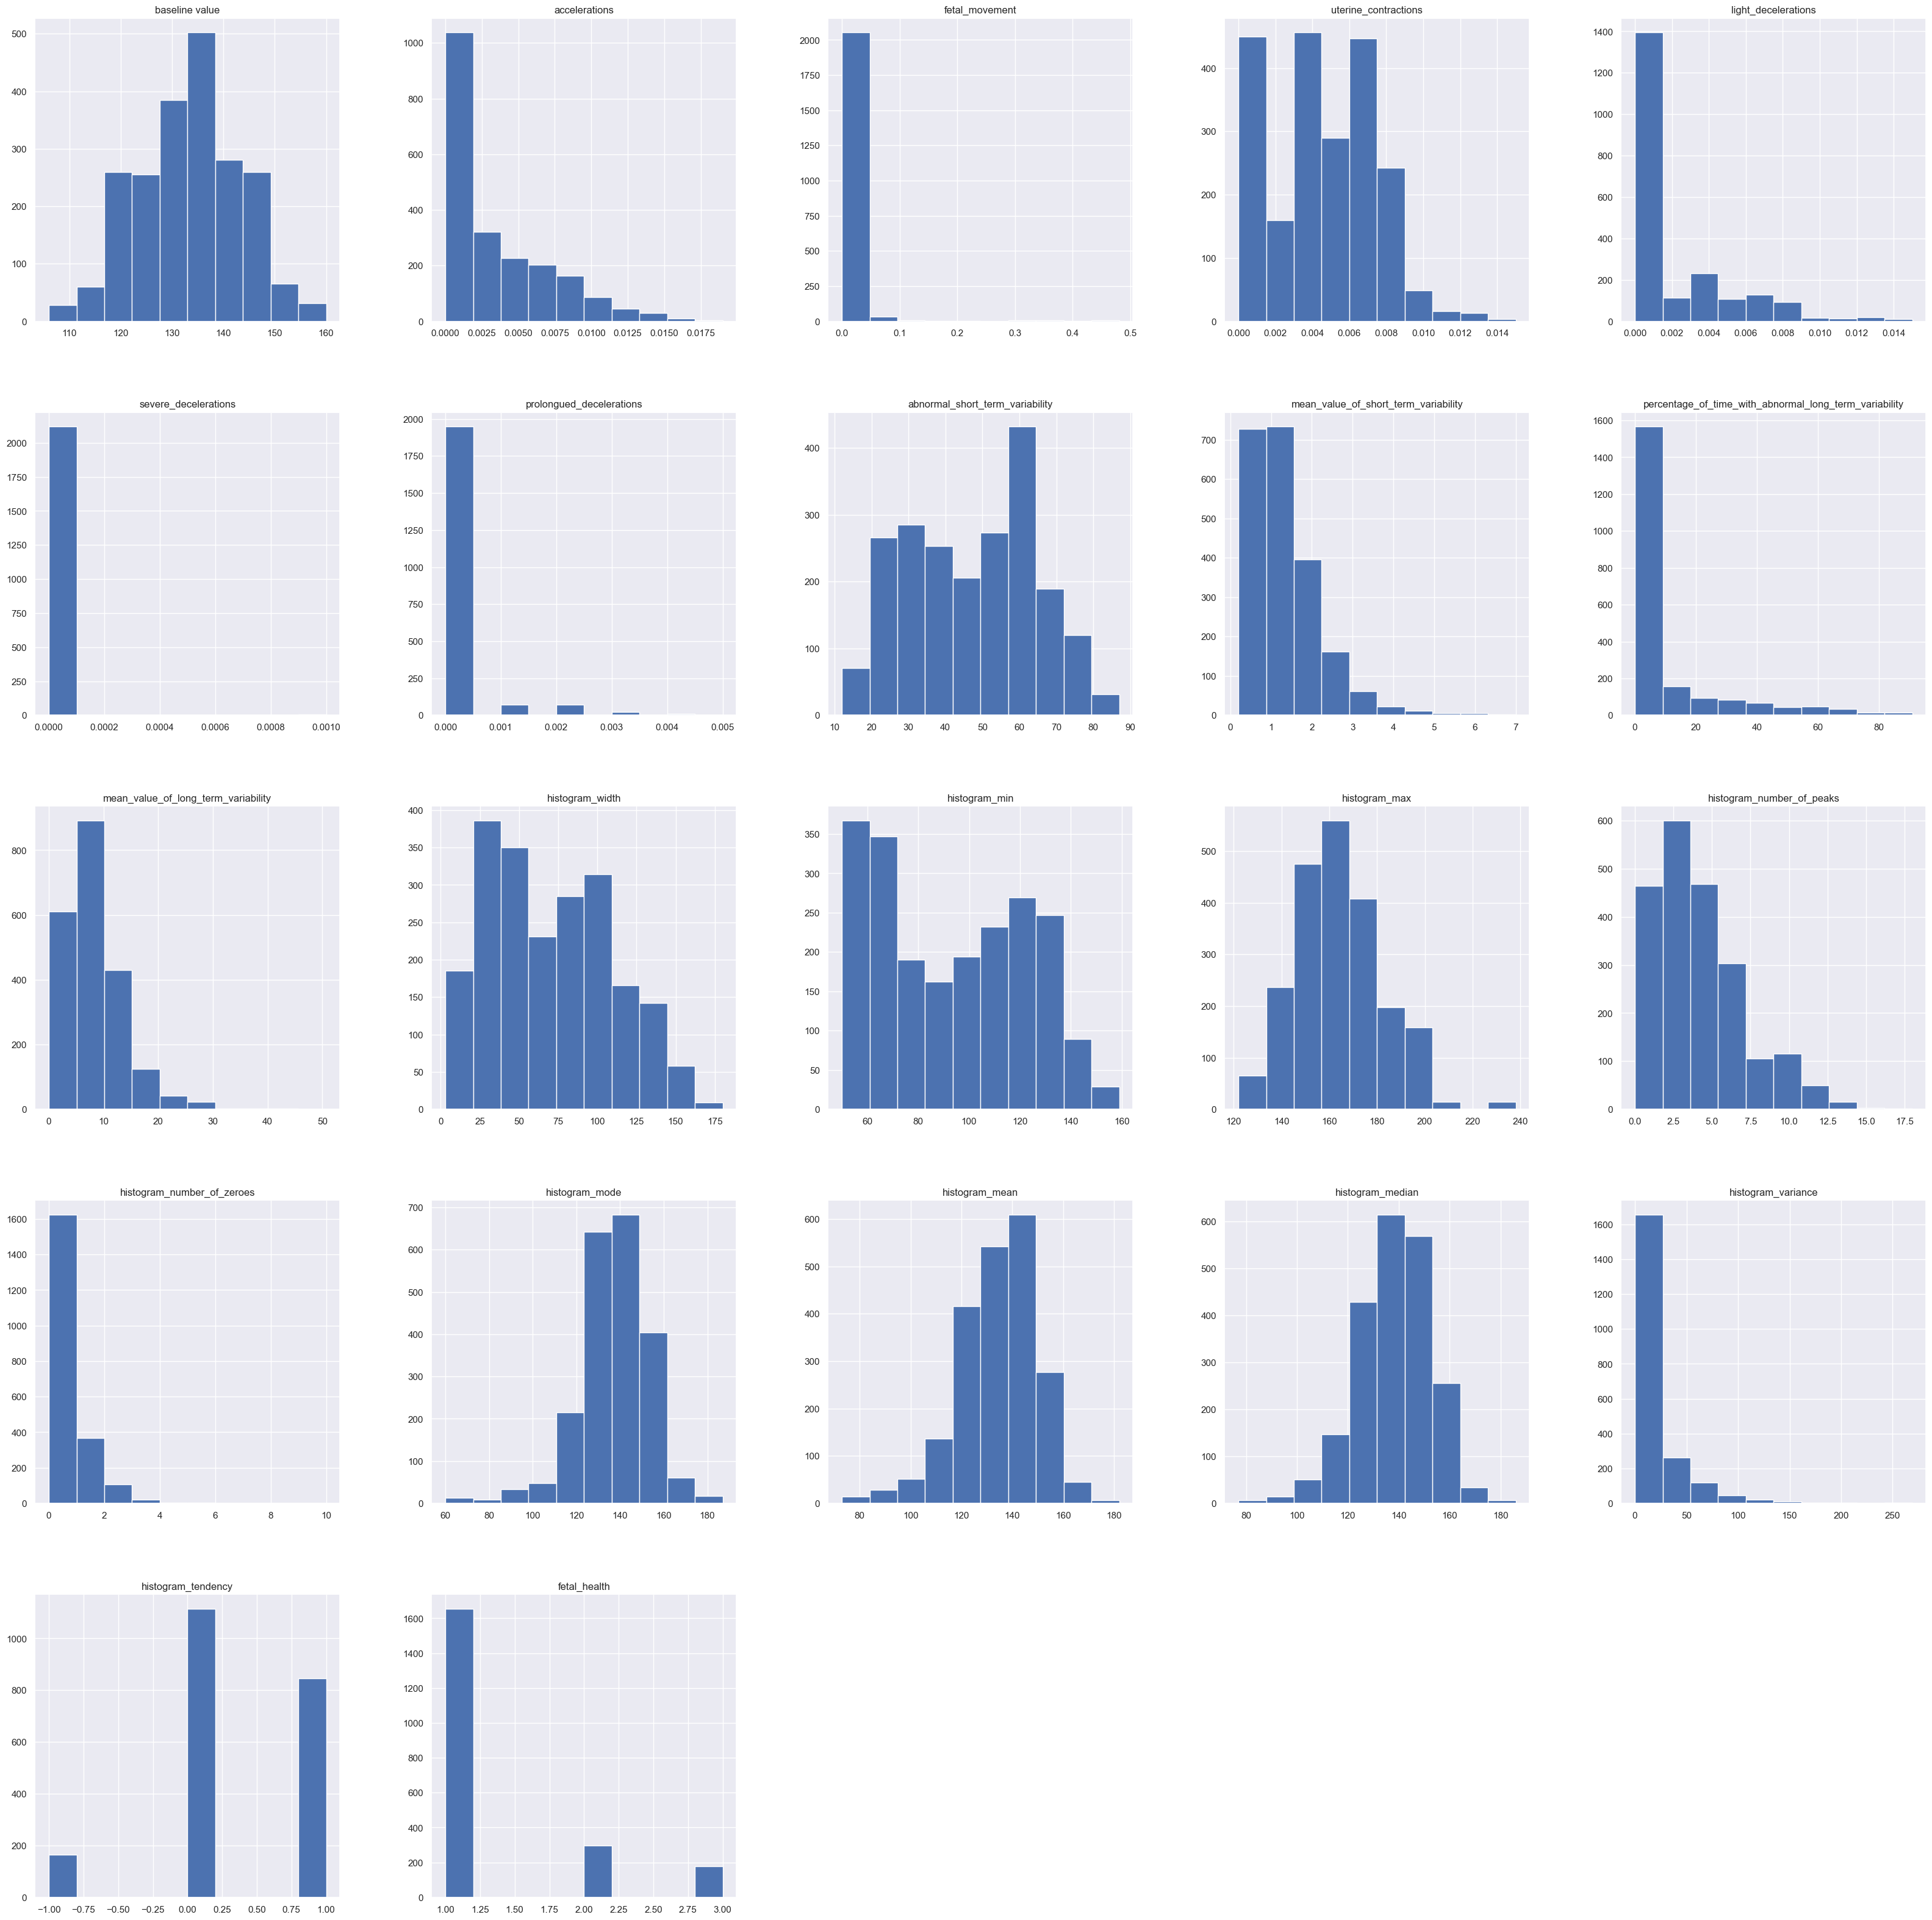

In [120]:
# Data Visualization every column
data_hist_plot = df.hist(figsize = (40,40))

In [121]:
# Grouping data based on fetal_health column (mean)
grouped = df.groupby(by='fetal_health').mean()
grouped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


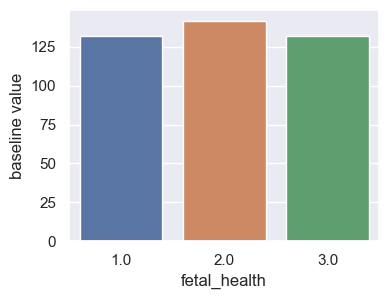

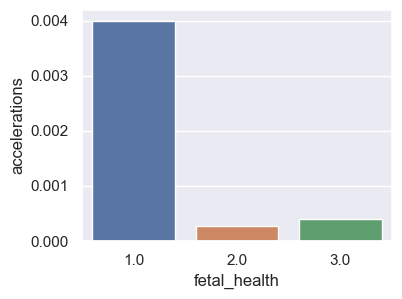

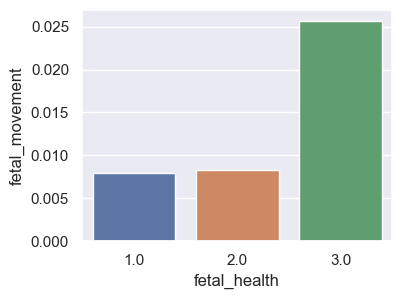

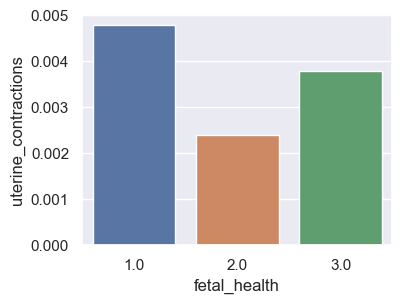

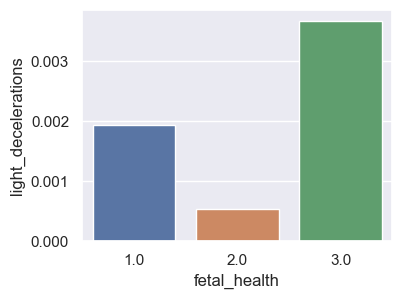

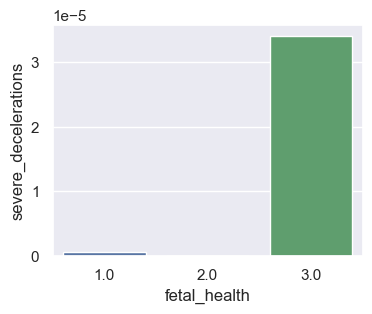

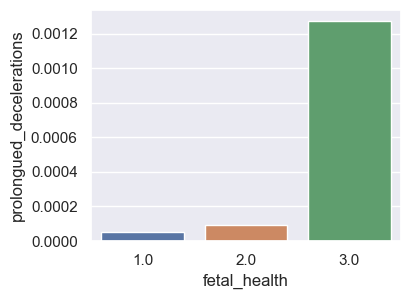

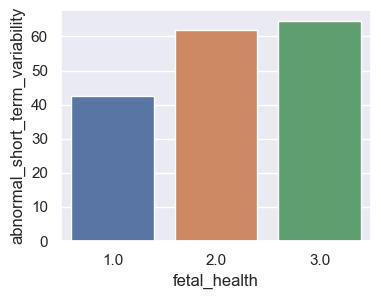

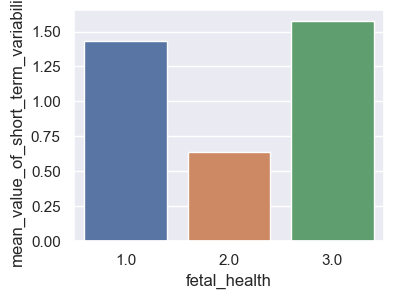

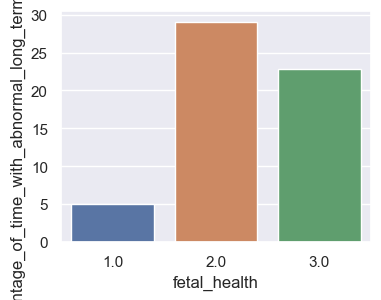

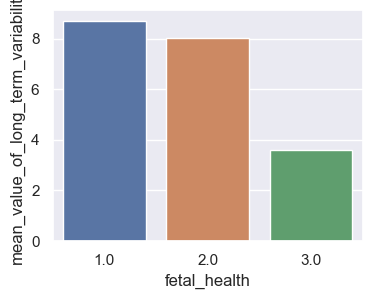

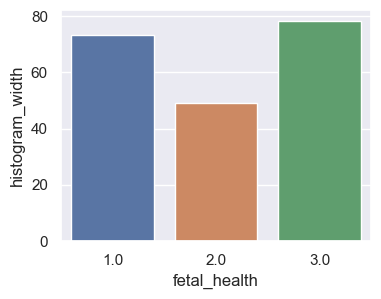

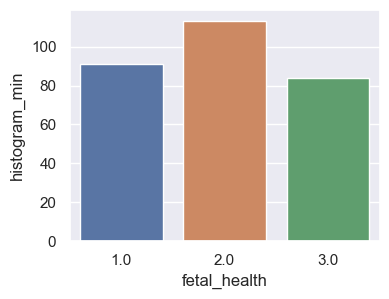

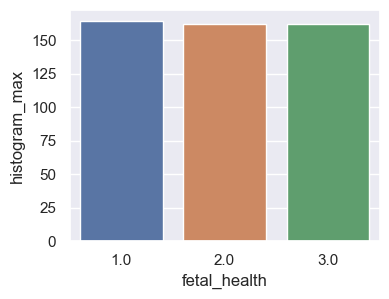

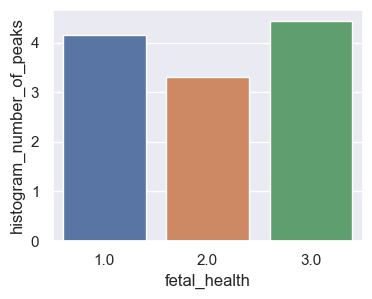

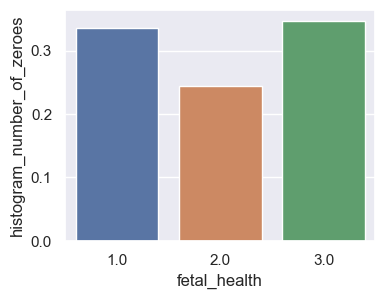

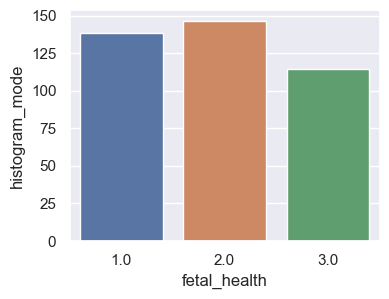

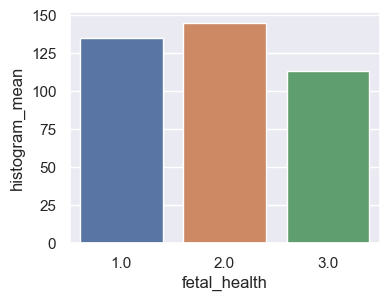

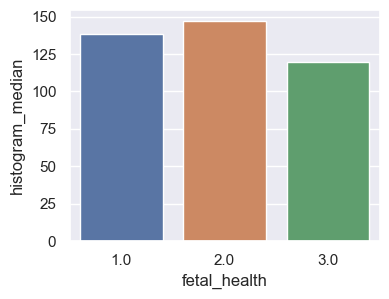

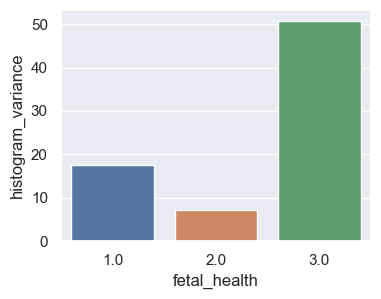

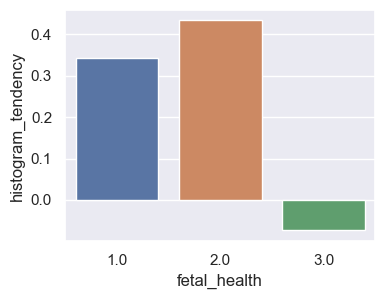

In [122]:
# Data Visualization fetal_health vs other column
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index, i in enumerate(grouped.columns, start=1):
  plt.figure(figsize=(4,3))
  sns.barplot(data=grouped, x=grouped.index, y=grouped[i])
  plt.show()

<hr>

## **3. Data Cleaning**

### **a. Handling Imbalanced Data on `fetal_health` column**

We will review the numeric description of the target column (`fetal health`).

In [123]:
df['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [124]:
df['fetal_health'].nunique()

3

`fetal_health` Column Description:
*   1.0 = Normal
*   2.0 = Suspect
*   3.0 = Pathological





It can be seen that the data is very unbalanced, where the median is 1. This indicates that a lot of `fetal_health` data has normal fetuses. We will see the distribution in detail using bar charts.

[]

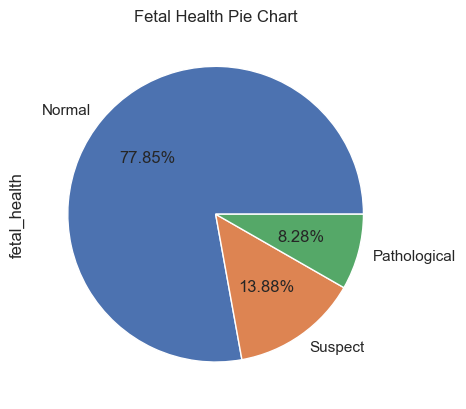

In [125]:
df2 = df.copy()
pie1 = pd.DataFrame(df2['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Fetal Health Pie Chart',y = 'fetal_health', autopct='%1.2f%%', shadow=False, labels=pie1['index'], legend = False)
plt.plot()

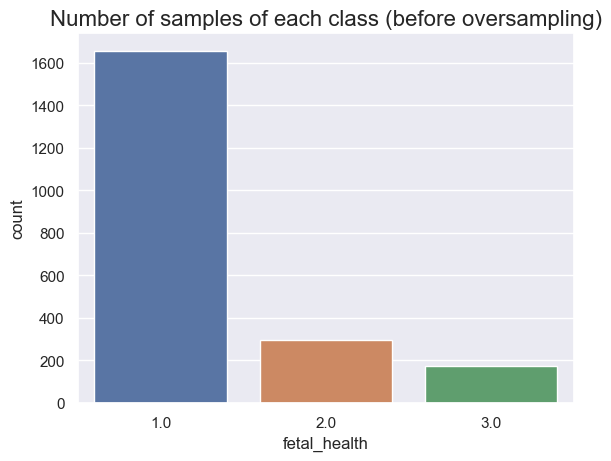

In [126]:
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='fetal_health')
plt.title('Number of samples of each class (before oversampling)', fontsize=16)
plt.show()

In [127]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

According to an article from the [Bumigora University Journal](https://journal.universitasbumigora.ac.id/index.php/matrik/article/view/2515), this unbalanced data will make the performance of the machine learning model created not be optimal. The impact of the class imbalance in the dataset is the occurrence of minority class misclassification, so it can affect classification performance.

To overcome imbalanced data, the Oversampling technique will be used in the minority class (2.0 & 3.0) so that the values are the same as the majority class (1.0). The consideration for using Oversampling is that the data size is not large enough (~2000) and to maintain the dataset so that no information is lost. To perform Oversampling on this dataset, we will use the [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) function from imblearn.

In [128]:
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X, y)

[]

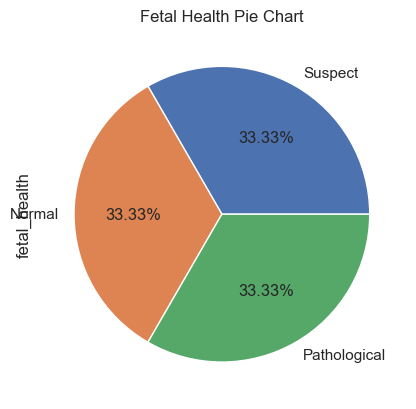

In [129]:
df2 = pd.DataFrame(y_over).copy()
pie1 = pd.DataFrame(df2['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Fetal Health Pie Chart',y = 'fetal_health', autopct='%1.2f%%', shadow=False, labels=pie1['index'], legend = False)
plt.plot()

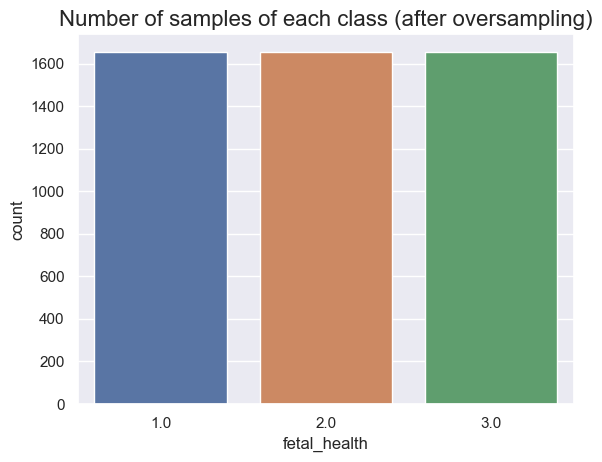

In [130]:
sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')
plt.title('Number of samples of each class (after oversampling)', fontsize=16)
plt.show()

In [131]:
y_over.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

<hr>

## **4. Machine Learning Modelling**

### **a. Train Test Split & Cross-validation**

In [132]:
x_balanced = X_over[['baseline value',
           'accelerations',
           'fetal_movement',
           'uterine_contractions',
           'light_decelerations',
           'severe_decelerations',
           'prolongued_decelerations',
           'abnormal_short_term_variability',
           'mean_value_of_short_term_variability',
           'percentage_of_time_with_abnormal_long_term_variability',
           'mean_value_of_long_term_variability',
           'histogram_width',
           'histogram_min',
           'histogram_max',
           'histogram_number_of_peaks',
           'histogram_number_of_zeroes',
           'histogram_mode',
           'histogram_mean',
           'histogram_median',
           'histogram_variance',
           'histogram_tendency']]

y_balanced = y_over

For splitting dataset into train & test, we need to ensure that the test set should represent most of the variance of the dataset. We will use a ratio of **70:30** for splitting train:test on this dataset. This refers to the reference from [baeldung.com](https://www.baeldung.com/cs/train-test-datasets-ratio) for a dataset of size **n<10,000**.
We will also use `random_state=2023` so that the output obtained does not change.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced,
                                                    y_balanced,
                                                    test_size=0.3,
                                                    random_state=2023)

In [134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3475, 21), (1490, 21), (3475,), (1490,))

In [135]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

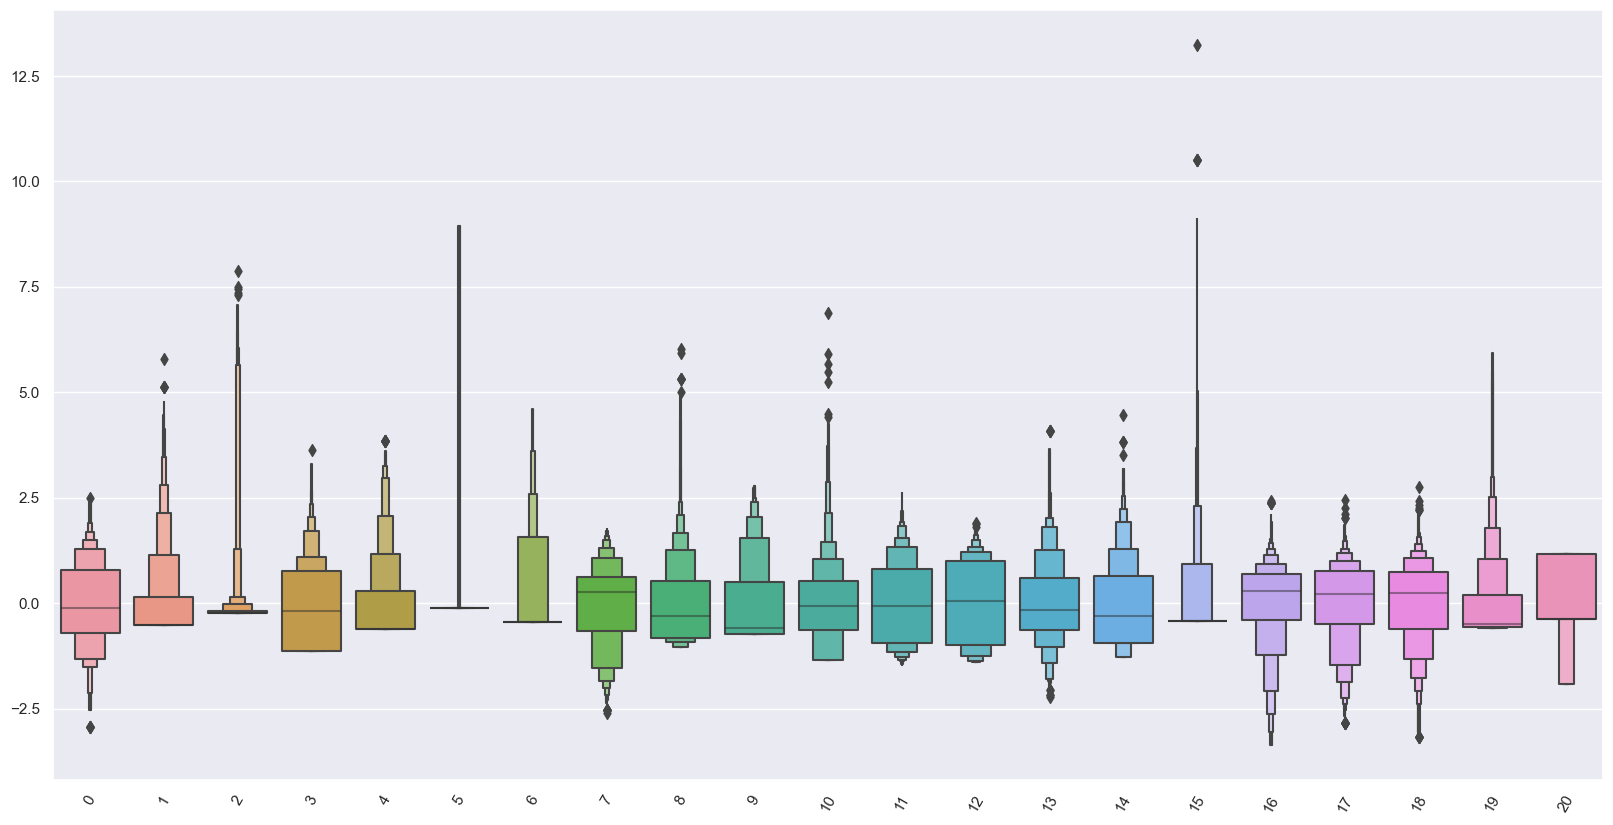

In [136]:
# Detecting outliers after split & normalize (train)
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train)
plt.xticks(rotation=60)
plt.show()

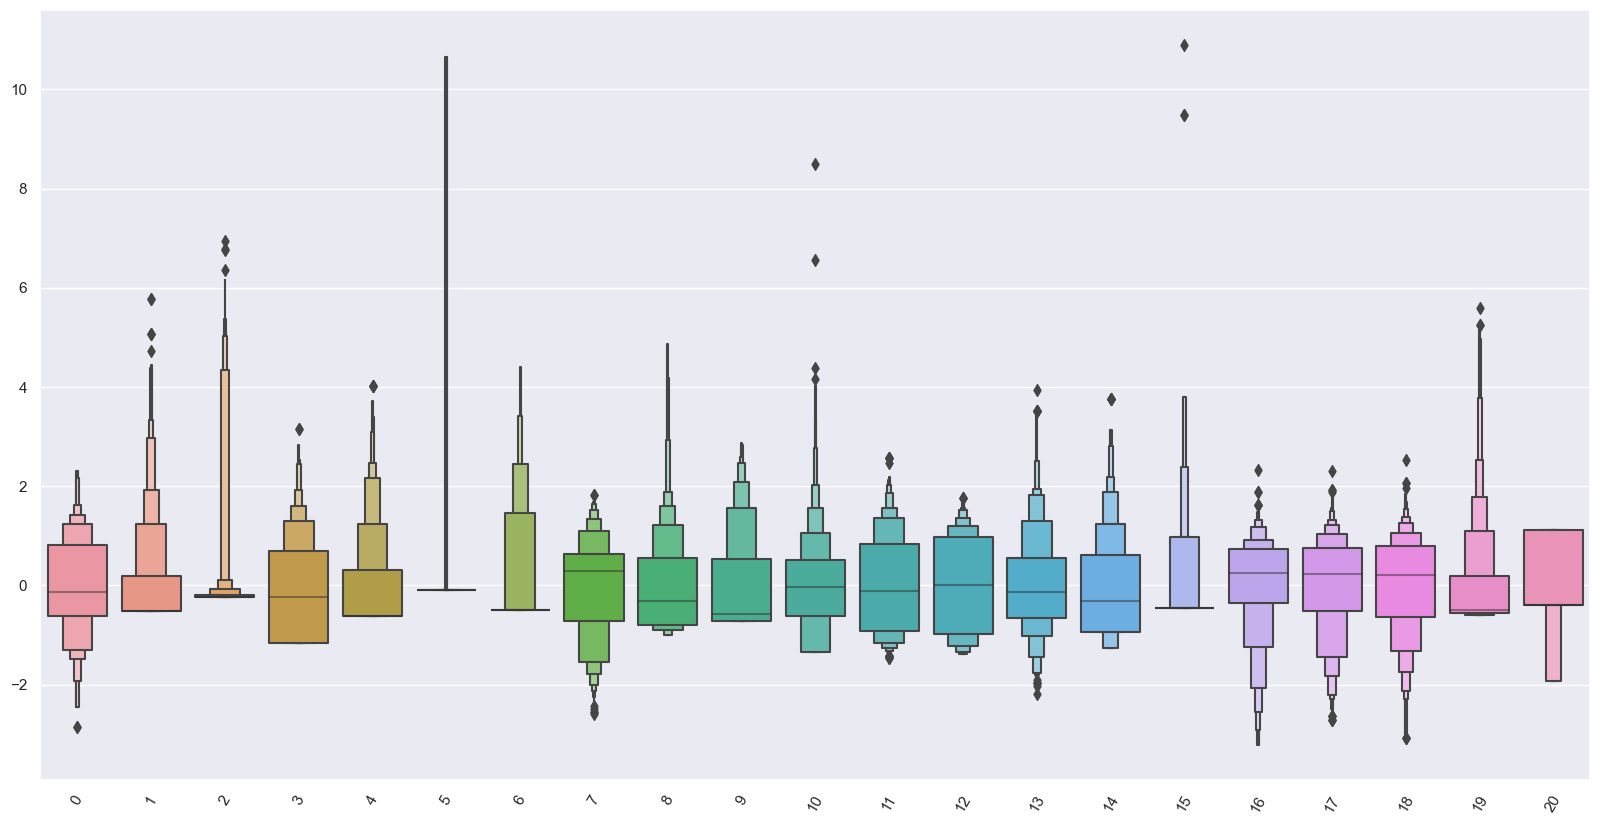

In [137]:
# Detecting outliers after split & normalize (test)
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_test)
plt.xticks(rotation=60)
plt.show()

### **b. Machine Learning Models**

1. Gradient Boosting Machine (GBM)
2. K-nearest neighbors (KNN)
3. Logistic Regression (LR)
4. Random Forest (RF)
5. Support Vector Machine (SVM)

**Grid Search & CV Method**

**Grid Search** is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model.

To accelerate Grid Search, we use **Cross Validation** (CV) method with n_splits=5 & n_jobs=2

In [138]:
cv_method = StratifiedKFold(n_splits=5,
                            shuffle=True,
                            random_state=2023
                            )

**Define Learning Curve**

In [139]:
def plot_learning_curve(estimator,
                        title,
                        x,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=-1,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            x,
                                                            y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='#80CBC4',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='#00897B',
             label='Cross-validation score')

    plt.legend(loc='best')

    return plt

#### 1. Gradient Boosting classifier (GBC)

In [140]:
# Default parameters
gbc = GradientBoostingClassifier(random_state=2023)
gbc_mod = gbc.fit(X_train, y_train)
score_gbc_test_before = gbc_mod.score(X_test,y_test)
print(f'Gradient Boosting Classifier default: {(score_gbc_test_before)}')

pred_gbc = gbc_mod.predict(X_test)

Gradient Boosting Classifier default: 0.9577181208053691


Tuning parameters

In [141]:
# Cross validation
scores_GBC = cross_val_score(gbc,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring='accuracy'
                             )

print(f'Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}')
print(f'CrossValMeans: {round(scores_GBC.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_GBC.std(), 3)}')

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.97697842 0.97697842 0.97553957 0.96258993 0.97985612]
CrossValMeans: 0.974
CrossValStandard Deviation: 0.006


Hyperparameter Tuning

In [142]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [143]:
GridSearchCV_GBC = GridSearchCV(estimator=gbc,
                                param_grid=params_GBC,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring='accuracy',
                                return_train_score=True
                                )

In [144]:
# Fit model with data train
GridSearchCV_GBC.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=2023), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'n_estimators': [250, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [145]:
# Best estimator
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(best_estimator_GBC)

GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=500,
                           random_state=2023)


<module 'matplotlib.pyplot' from 'c:\\Users\\HMMI\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

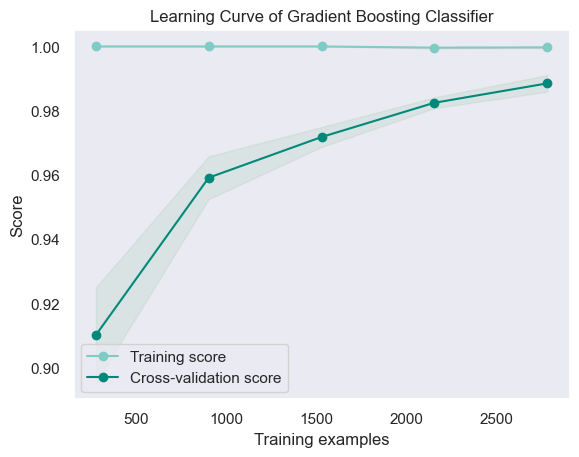

In [146]:
# Gradient Boosting Classifier learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_GBC.best_estimator_,
                    title = 'Learning Curve of Gradient Boosting Classifier',
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [147]:
# Best params
best_params_GBC = GridSearchCV_GBC.best_params_
print(best_params_GBC)

{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}


In [148]:
print(f'Best score for GBC model: {round(GridSearchCV_GBC.best_score_, 3)}')

Best score for GBC model: 0.988


In [149]:
# Grid Search return the best paramters
gbc = GradientBoostingClassifier(loss=GridSearchCV_GBC.best_estimator_.get_params()['loss'],
                                 learning_rate=GridSearchCV_GBC.best_estimator_.get_params()['learning_rate'],
                                 n_estimators=GridSearchCV_GBC.best_estimator_.get_params()['n_estimators'],
                                 max_depth=GridSearchCV_GBC.best_estimator_.get_params()['max_depth'],
                                 random_state=2023
                                 )
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test,pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test,pred_gbc))
score_gbc_train = gbc_mod.score(X_train,y_train)
score_gbc_test = gbc_mod.score(X_test,y_test)

In [150]:
print(f'Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}')
print(f'Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}')
print(f'R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}')
print(f'R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}')

Mean Square Error for Gradient Boosting Classifier = 0.03
Root Mean Square Error for Gradient Boosting Classifier = 0.174
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.976


Model Performance Analysis

In [151]:
# Classification report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, pred_gbc))

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98       491
         2.0       0.96      0.97      0.97       491
         3.0       0.98      0.98      0.98       508

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



In [152]:
# Form confusion matrix as a DataFrame
confusion_matrix_gbc = pd.DataFrame((confusion_matrix(y_test, pred_gbc)))

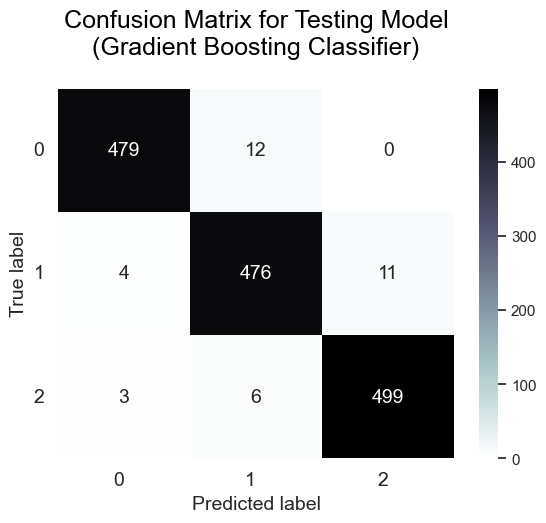

In [153]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbc, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### 2. K-nearest neighbors (KNN)

In [154]:
# Default parameters
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
score_knn_test_before = knn_mod.score(X_test,y_test)
print(f'K-nearest neighbors default: {(score_knn_test_before)}')

pred_knn = knn_mod.predict(X_test)

K-nearest neighbors default: 0.9456375838926174


Tuning parameters

In [155]:
# Cross validation
scores_knn = cross_val_score(knn,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring='accuracy')

print(f'Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}')
print(f'CrossValMeans: {round(scores_knn.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_knn.std(), 3)}')

Scores(Cross validate) for K-Nearest Neighbors model:
[0.9294964  0.92374101 0.93093525 0.93381295 0.93669065]
CrossValMeans: 0.931
CrossValStandard Deviation: 0.004


Hyperparameter Tuning

In [156]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [157]:
GridSearchCV_knn = GridSearchCV(estimator=knn,
                               param_grid=params_knn,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True
                               )

In [158]:
# Fit model with data train
GridSearchCV_knn.fit(X_train, y_train)

Fitting 5 folds for each of 1160 candidates, totalling 5800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [159]:
# Best estimator
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(best_estimator_knn)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


<module 'matplotlib.pyplot' from 'c:\\Users\\HMMI\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

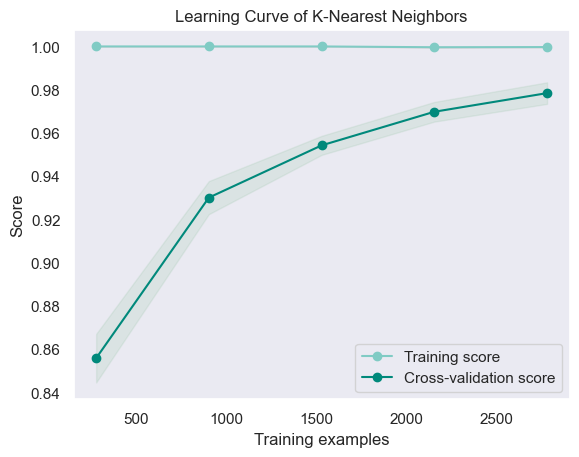

In [160]:
# K-Nearest Neighbors learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_knn.best_estimator_,
                    title = 'Learning Curve of K-Nearest Neighbors',
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [161]:
# Best params
best_params_knn = GridSearchCV_knn.best_params_
print(best_params_knn)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [162]:
print(f'Best score for KNN model: {round(GridSearchCV_knn.best_score_, 3)}')

Best score for KNN model: 0.978


In [163]:
# Grid Search return the best paramters
knn = KNeighborsClassifier(leaf_size=GridSearchCV_knn.best_estimator_.get_params()['leaf_size'],
                           n_neighbors=GridSearchCV_knn.best_estimator_.get_params()['n_neighbors'],
                           p=GridSearchCV_knn.best_estimator_.get_params()['p'],
                           algorithm=GridSearchCV_knn.best_estimator_.get_params()['algorithm']
                           ) #NOT using random state
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test,pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
score_knn_train = knn_mod.score(X_train,y_train)
score_knn_test = knn_mod.score(X_test,y_test)

In [164]:
print(f'Mean Square Error for K-nearest neighbors = {round(mse_knn, 3)}')
print(f'Root Mean Square Error for K-nearest neighbors = {round(rmse_knn, 3)}')
print(f'R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}')
print(f'R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}')

Mean Square Error for K-nearest neighbors = 0.018
Root Mean Square Error for K-nearest neighbors = 0.135
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.982


Model Performance Analysis

In [165]:
# Classification report
print('Classification Report Testing Model (K-nearest neighbors):')
print(classification_report(y_test, pred_knn))

Classification Report Testing Model (K-nearest neighbors):
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       491
         2.0       0.95      1.00      0.97       491
         3.0       1.00      1.00      1.00       508

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



In [166]:
# Form confusion matrix as a DataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, pred_knn)))

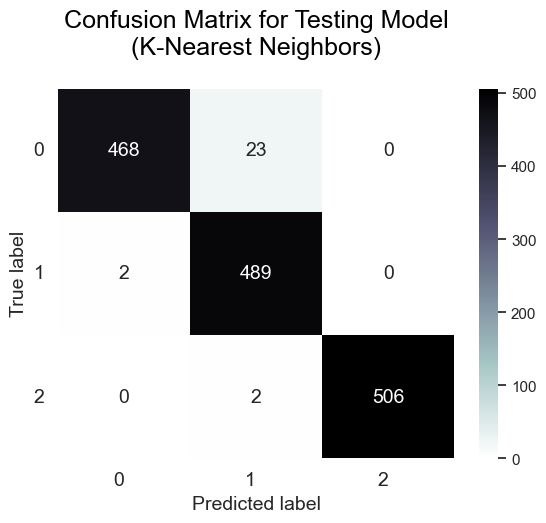

In [167]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### 3. Logistic Regression (LR)

In [168]:
# Default parameters
logistic_regression = linear_model.LogisticRegression(random_state=2023)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
score_logistic_regression_test_before = logistic_regression_mod.score(X_test,y_test)
print(f'Logistic Regression default: {(score_logistic_regression_test_before)}')

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Logistic Regression default: 0.859731543624161


Tuning parameters

In [169]:
# Cross validation
scores_Logistic = cross_val_score(logistic_regression,
                                  X_train,
                                  y_train,
                                  cv=cv_method,
                                  n_jobs=-1,
                                  scoring='accuracy')

print(f'Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}')
print(f'CrossValMeans: {round(scores_Logistic.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}')

Scores(Cross validate) for Logistic Regression model:
[0.87625899 0.87194245 0.88776978 0.86906475 0.85611511]
CrossValMeans: 0.872
CrossValStandard Deviation: 0.01


Hyperparameter Tuning

In [170]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [171]:
GridSearchCV_LR = GridSearchCV(estimator=logistic_regression,
                               param_grid=params_LR,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True
                               )

In [172]:
# Fit model with data train
GridSearchCV_LR.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=LogisticRegression(random_state=2023), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [173]:
# Best estimator
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(best_estimator_LR)

LogisticRegression(C=0.1, random_state=2023)


<module 'matplotlib.pyplot' from 'c:\\Users\\HMMI\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

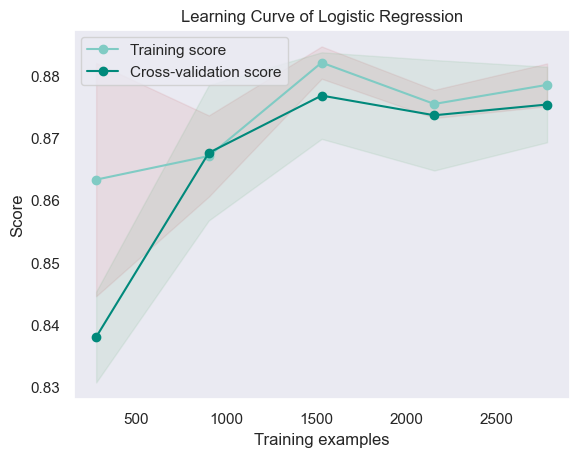

In [174]:
# Logistic Regression learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_LR.best_estimator_,
                    title='Learning Curve of Logistic Regression',
                    x=X_train,
                    y=y_train,
                    cv=cv_method
                    )

In [175]:
# Best params
best_params_LR = GridSearchCV_LR.best_params_
print(best_params_LR)

{'C': 0.1, 'intercept_scaling': 1, 'tol': 0.0001}


In [176]:
print(f'Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}')

Best score for LR model: 0.875


In [177]:
# Grid Search return the best paramters
logistic_regression = linear_model.LogisticRegression(C=GridSearchCV_LR.best_estimator_.get_params()['C'],
                                                      intercept_scaling=GridSearchCV_LR.best_estimator_.get_params()['intercept_scaling'],
                                                      tol=GridSearchCV_LR.best_estimator_.get_params()['tol'],
                                                      max_iter=GridSearchCV_LR.best_estimator_.get_params()['max_iter'],
                                                      penalty=GridSearchCV_LR.best_estimator_.get_params()['penalty'],
                                                      solver='liblinear',
                                                      random_state=2023 #using random state
                                                      )
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test,pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test,pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train,y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test,y_test)

In [178]:
print(f'Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}')
print(f'Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}')
print(f'R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}')
print(f'R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}')

Mean Square Error for Logistic Regression = 0.172
Root Mean Square Error for Logistic Regression = 0.415
R^2(coefficient of determination) on training set = 0.874
R^2(coefficient of determination) on testing set = 0.854


Model Performance Analysis

In [179]:
# Classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, pred_logistic_regression))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         1.0       0.94      0.87      0.90       491
         2.0       0.77      0.84      0.80       491
         3.0       0.87      0.85      0.86       508

    accuracy                           0.85      1490
   macro avg       0.86      0.85      0.86      1490
weighted avg       0.86      0.85      0.86      1490



In [180]:
# Form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, pred_logistic_regression)))

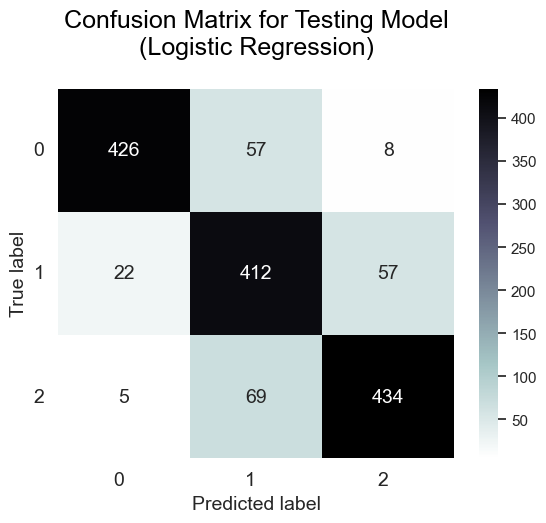

In [181]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### 4. Random Forest (RF)

In [182]:
# Default parameters
random_forest = RandomForestClassifier(random_state=2023)
random_forest_mod = random_forest.fit(X_train, y_train)
score_random_forest_test_before = random_forest_mod.score(X_test,y_test)
print(f'Random Forest default: {(score_random_forest_test_before)}')

pred_random_forest = random_forest_mod.predict(X_test)

Random Forest default: 0.9805369127516779


Tuning parameters

In [183]:
# Cross validation
scores_random_forest = cross_val_score(random_forest,
                                       X_train,
                                       y_train,
                                       cv=cv_method,
                                       n_jobs=-1,
                                       scoring='accuracy'
                                       )

print(f'Scores(Cross validate) for Random Forest model:\n{scores_random_forest}')
print(f'CrossValMeans: {round(scores_random_forest.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_random_forest.std(), 3)}')

Scores(Cross validate) for Random Forest model:
[0.98273381 0.97985612 0.98273381 0.98129496 0.97841727]
CrossValMeans: 0.981
CrossValStandard Deviation: 0.002


Hyperparameter Tuning

In [184]:
params_random_forest = {"min_samples_split": [2, 6, 20],
                        "min_samples_leaf": [1, 4, 16],
                        "n_estimators" :[100,200,300,400],
                        "criterion": ["gini"]             
                        }

In [185]:
GridSearchCV_random_forest = GridSearchCV(estimator=random_forest,
                                          param_grid=params_random_forest,
                                          cv=cv_method,
                                          verbose=1,
                                          n_jobs=-1,
                                          scoring='accuracy',
                                          return_train_score=True
                                          )

In [186]:
# Fit model with data train
GridSearchCV_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(random_state=2023), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [187]:
# Best estimator
best_estimator_random_forest = GridSearchCV_random_forest.best_estimator_
print(best_estimator_random_forest)

RandomForestClassifier(n_estimators=300, random_state=2023)


<module 'matplotlib.pyplot' from 'c:\\Users\\HMMI\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

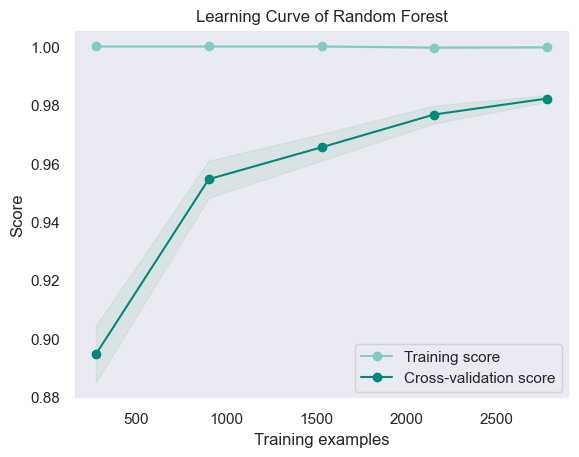

In [188]:
# Random Forest learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_random_forest.best_estimator_,
                    title = 'Learning Curve of Random Forest',
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [189]:
# Best params
best_params_random_forest = GridSearchCV_random_forest.best_params_
print(best_params_random_forest)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [190]:
print(f'Best score for RF model: {round(GridSearchCV_random_forest.best_score_, 3)}')

Best score for RF model: 0.982


In [191]:
# Grid Search return the best paramters
random_forest = RandomForestClassifier(criterion=GridSearchCV_random_forest.best_estimator_.get_params()['criterion'],
                                       n_estimators=GridSearchCV_random_forest.best_estimator_.get_params()['n_estimators'],
                                       min_samples_leaf=GridSearchCV_random_forest.best_estimator_.get_params()['min_samples_leaf'],
                                       min_samples_split=GridSearchCV_random_forest.best_estimator_.get_params()['min_samples_split'],
                                       max_features=GridSearchCV_random_forest.best_estimator_.get_params()['max_features'],
                                       random_state=2023)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test,pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test,pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train,y_train)
score_random_forest_test = random_forest_mod.score(X_test,y_test)

In [192]:
print(f'Mean Square Error for Random Forest = {round(mse_random_forest, 3)}')
print(f'Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}')
print(f'R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}')
print(f'R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}')

Mean Square Error for Random Forest = 0.019
Root Mean Square Error for Random Forest = 0.137
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.981


Model Performance Analysis

In [193]:
# Classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, pred_random_forest))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98       491
         2.0       0.96      0.98      0.97       491
         3.0       0.99      1.00      0.99       508

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



In [194]:
# Form confusion matrix as a DataFrame
confusion_matrix_random_forest = pd.DataFrame((confusion_matrix(y_test, pred_random_forest)))

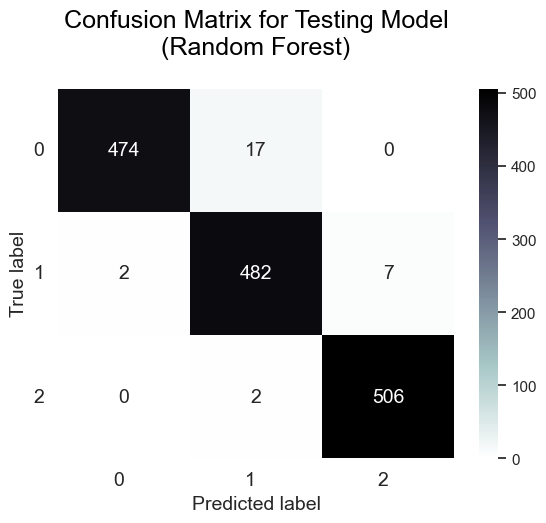

In [195]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_random_forest, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### 5. Support Vector Machine (SVM)

In [196]:
# Default parameters
svm = SVC(random_state=2023)
svm_mod = svm.fit(X_train, y_train)
score_svm_test_before = svm_mod.score(X_test,y_test)
print(f'Support Vector Machine default: {(score_svm_test_before)}')

pred_svm = svm_mod.predict(X_test)

Support Vector Machine default: 0.9174496644295302


Tuning parameters

In [197]:
# Cross validation
scores_svm = cross_val_score(svm,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring='accuracy'
                             )

print(f'Scores(Cross validate) for Support Vector Machine model:\n{scores_svm}')
print(f'CrossValMeans: {round(scores_svm.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_svm.std(), 3)}')

Scores(Cross validate) for Support Vector Machine model:
[0.91654676 0.91798561 0.92805755 0.91798561 0.9294964 ]
CrossValMeans: 0.922
CrossValStandard Deviation: 0.006


Hyperparameter Tuning

In [198]:
params_svm = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'linear']
              }

In [199]:
GridSearchCV_svm = GridSearchCV(estimator=svm,
                                param_grid=params_svm,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring='accuracy',
                                return_train_score=True
                                )

In [200]:
# Fit model with data train
GridSearchCV_svm.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [201]:
# Best estimator
best_estimator_svm = GridSearchCV_svm.best_estimator_
print(best_estimator_svm)

SVC(C=1000, gamma=1, random_state=2023)


<module 'matplotlib.pyplot' from 'c:\\Users\\HMMI\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

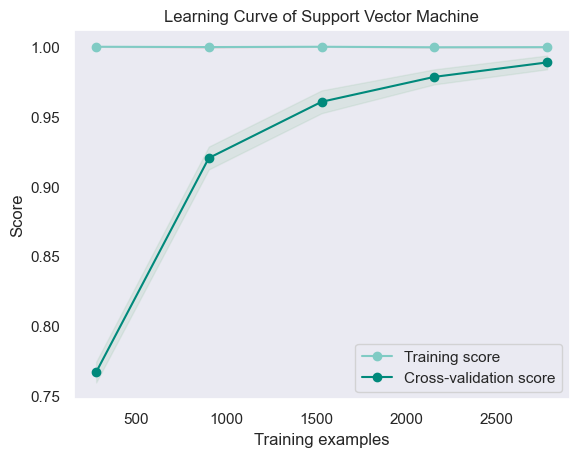

In [202]:
# Support Vector Machine learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_svm.best_estimator_,
                    title = 'Learning Curve of Support Vector Machine',
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [203]:
# Best params
best_params_svm = GridSearchCV_svm.best_params_
print(best_params_svm)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [204]:
print(f'Best score for SVC model: {round(GridSearchCV_svm.best_score_, 3)}')

Best score for SVC model: 0.989


In [205]:
# Grid Search return the best paramters
svm = SVC(C=GridSearchCV_svm.best_estimator_.get_params()['C'],
          gamma=GridSearchCV_svm.best_estimator_.get_params()['gamma'],
          random_state=2023
          )
svm_mod = svm.fit(X_train, y_train)
pred_svm = svm_mod.predict(X_test)

mse_svm = mean_squared_error(y_test,pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test,pred_svm))
score_svm_train = svm_mod.score(X_train,y_train)
score_svm_test = svm_mod.score(X_test,y_test)

In [206]:
print(f'Mean Square Error for Support Vector Machine = {round(mse_svm, 3)}')
print(f'Root Mean Square Error for Support Vector Machine = {round(rmse_svm, 3)}')
print(f'R^2(coefficient of determination) on training set = {round(score_svm_train, 3)}')
print(f'R^2(coefficient of determination) on testing set = {round(score_svm_test, 3)}')

Mean Square Error for Support Vector Machine = 0.054
Root Mean Square Error for Support Vector Machine = 0.232
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.972


Model Performance Analysis

In [207]:
# Classification report
print('Classification Report Testing Model (Support Vector Machine):')
print(classification_report(y_test, pred_svm))

Classification Report Testing Model (Support Vector Machine):
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       491
         2.0       0.96      0.98      0.97       491
         3.0       1.00      0.96      0.98       508

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



In [208]:
# Form confusion matrix as a DataFrame
confusion_matrix_svm = pd.DataFrame((confusion_matrix(y_test, pred_svm)))

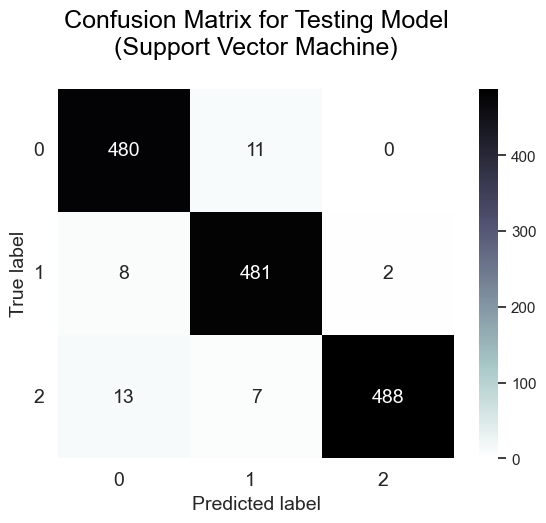

In [209]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_svm, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Support Vector Machine)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **c. Model Selection**

In [210]:
results = pd.DataFrame([['Gradient Boosting classifier',
                         score_gbc_train,
                         score_gbc_test,
                         abs(score_gbc_train-score_gbc_test)],
                        ['K-nearest neighbors',
                         score_knn_train,
                         score_knn_test,
                         abs(score_knn_train-score_knn_test)],
                        ['Logistic Regression',
                         score_logistic_regression_train,
                         score_logistic_regression_test,
                         abs(score_logistic_regression_train-score_logistic_regression_test)],
                        ['Random Forest',
                         score_random_forest_train,
                         score_random_forest_test,
                         abs(score_random_forest_train-score_random_forest_test)],
                        ['Support Vector Machine',
                         score_svm_train,
                         score_svm_test,
                         abs(score_svm_train-score_svm_test)]],
                       columns = ['Models',
                                  'Training Score',
                                  'Testing Score',
                                  'Error'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Score,Testing Score,Error
1,K-nearest neighbors,0.999712,0.981879,0.017833
3,Random Forest,0.999712,0.981208,0.018504
0,Gradient Boosting classifier,0.999712,0.975839,0.023873
4,Support Vector Machine,0.999712,0.972483,0.027229
2,Logistic Regression,0.873669,0.853691,0.019978


Conclusion:

**K-nearest neighbors** has the highest training score & testing score among the others model. This shows that the K-nearest neighbors is the most suitable model to predict this `fetal_health.csv` dataset. But, other models can still be optimized using more precise tuning parameters.

In [211]:
tune = pd.DataFrame([['Gradient Boosting classifier',
                         score_gbc_test_before,
                         score_gbc_test,
                         (score_gbc_test-score_gbc_test_before)],
                        ['K-nearest neighbors',
                         score_knn_test_before,
                         score_knn_test,
                         (score_knn_test-score_knn_test_before)],
                        ['Logistic Regression',
                         score_logistic_regression_test_before,
                         score_logistic_regression_test,
                         (score_logistic_regression_test-score_logistic_regression_test_before)],
                        ['Random Forest',
                         score_random_forest_test_before,
                         score_random_forest_test,
                         (score_random_forest_test-score_random_forest_test_before)],
                        ['Support Vector Machine',
                         score_svm_test_before,
                         score_svm_test,
                         (score_svm_test-score_svm_test_before)]],
                       columns = ['Models',
                                  'Testing Score Before Tuning Parameters',
                                  'Testing Score After Tuning Parameters',
                                  'Diff'])

tune.sort_values(by=['Diff'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Testing Score Before Tuning Parameters,Testing Score After Tuning Parameters,Diff
4,Support Vector Machine,0.917450,0.972483,0.055034
1,K-nearest neighbors,0.945638,0.981879,0.036242
0,Gradient Boosting classifier,0.957718,0.975839,0.018121
3,Random Forest,0.980537,0.981208,0.000671
2,Logistic Regression,0.859732,0.853691,-0.006040


From the tuning, we looks that Support Vector Machine (SVM) is the most improved models with appropriate tuning.

### **d. Saving Model**

Selected model: K-nearest neighbors

In [212]:
with open('FetalHealthClassificationFinal','wb') as f:
    pickle.dump(knn,f)

<hr>

# **D. Conclusion & Recommendation**

<hr>

## **1. Conclusion**

* This dataset is quite clean with no extreme & unreasonable outlier. This dataset also has no missing value found. But for the label (`fetal_health`) is not too good because of imbalance classification, where the dataset contain **77.85%** normal fetus label (1.0). This problem solved by do the oversampling.
* The most correlated factor with fetal health is **Abnormal Fetal Heart Rate - FHR** (`prolongued_decelerations`) with value **0.48**. The other factor is **Abnormal Short & Long Term Variability** also have high correlation with the value **0.47** & **0.43**, respectively. Short Term Variability is the percentage of subsequent FHR signals differing less than 1 bpm (`abnormal_short_term_variability`). Abnormal Long Term Variability is the percentage of FHR signals with a difference between the minimum and maximum values in a 1 min window lower than 5 bpm (`percentage_of_time_with_abnormal_long_term_variability`). [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8442730/).
* The Best Model is **K-nearest neighbors** with training score **99.97%** & testing score **98.19%** with error **1.78%**. The model added, Support Vector Machine, has the most improved tuning model with improvement **5.5%**.


<hr>

## **2. Recommendation**

* Building a model using feature selection to select column that only have high correlation with target
* Hyperparameter tuning optimization can use [Optuna](https://optuna.org/) to improve model performance